In [2]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

In [3]:
# basic dictionary implementation using binary search tree

class TreeNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key, value):
        self.root = self._insert(self.root, key, value)

    def _insert(self, root, key, value):
        if root is None:
            return TreeNode(key, value)
        
        if key < root.key:
            root.left = self._insert(root.left, key, value)
        elif key > root.key:
            root.right = self._insert(root.right, key, value)
        else:
            # Update the value if the key already exists
            root.value = value

        return root

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, root, key):
        if root is None or root.key == key:
            return root.value

        if key < root.key:
            return self._search(root.left, key)
        else:
            return self._search(root.right, key)

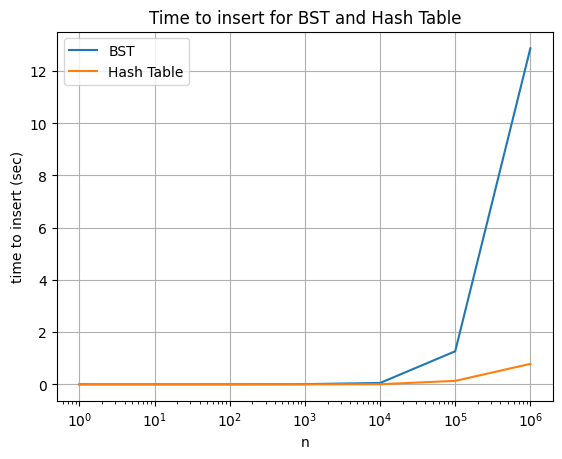

In [7]:
# Generate an array of n numbers
n = [10**j for j in range(7)]

bstTime = []
hashTime = []

# dictionary using binary search tree
def TESTBST(n):
    array = np.random.randint(0, 2*n, size=n)
    array2 = np.random.randint(0, 2*n, size=n)
    bst = BinarySearchTree()
    for i in range(n):
        bst.insert(array[i], array2[i])

# built in python dictionary uses hash table
def TESTHASH(n):
    array = np.random.randint(0, 2*n, size=n)
    array2 = np.random.randint(0, 2*n, size=n)
    d = {}
    for i in range(n):
        d[array[i]] = array2[i]

num = 5

for i in n:
    # test the time to insert for BST dictionary
    bstTime.append(timeit.timeit(lambda: TESTBST(i), number=num)/5)

    # test the time to insert for hash table dictionary
    hashTime.append(timeit.timeit(lambda: TESTHASH(i), number=num)/5)


# plot the time to insert for BST dictionary
plt.plot(n, bstTime, label='BST')

# plot the time to insert for hash table dictionary
plt.plot(n, hashTime, label='Hash Table')

plt.xlabel('n')
plt.ylabel('time to insert (sec)')
plt.title('Time to insert for BST and Hash Table')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()